In [38]:
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.model_selection import train_test_split
from time import time
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# from sklearn.decomposition import PCA

from sklearn import preprocessing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data1.csv')
X = data.copy()
X = X.drop('id', axis=1)
X = X.drop('diagnosis', axis=1)
y = data['diagnosis']
target=y
knn = KNeighborsClassifier(n_neighbors=4)


In [26]:
X.shape, y.shape

((569, 30), (569,))

In [27]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X, target, test_size = 0.3)

In [45]:
%%time
lgr=LGR(max_iter=10000)
lgr.fit(X_train_m1,y_train_m1)

Wall time: 314 ms


LogisticRegression(max_iter=10000)

In [30]:
lgr.score(X_test_m1,y_test_m1)

0.9590643274853801

In [31]:
feature_names=tuple(X.columns)
feature_names

('radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst')

In [44]:
feature_names = tuple(X.columns)
start_time_2 = time()
sfs2 = SFS(  # knn(n_neighbors=3),
    # rfc(n_jobs=8),
    LGR(max_iter=5000),
    k_features='best',
    forward=False,
    floating=False,
    verbose=2,
    # scoring = 'neg_mean_squared_error',  # sklearn regressors
    scoring='accuracy',  # sklearn classifiers
    cv=0)
sfs2 = sfs2.fit(X, y, custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.6s finished

[2022-07-19 04:04:34] Features: 29/1 -- score: 0.9630931458699473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   10.6s finished

[2022-07-19 04:04:45] Features: 28/1 -- score: 0.9630931458699473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   10.0s finished

[2022-07-19 04:04:55] Features: 27/1 -- score: 0.9630931458699473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [57]:
print("Selected features")
print(sfs2.k_feature_names_)
features_list_2 = np.array(sfs2.k_feature_names_)
print("Selected features shape ", features_list_2.shape)
print("Time taken ", (time() - start_time_2), " seconds")
print("Accuracy ",sfs2.k_score_)

Selected features
('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst')
Selected features shape  (29,)
Time taken  147.93930506706238  seconds
Accuracy  0.9630931458699473


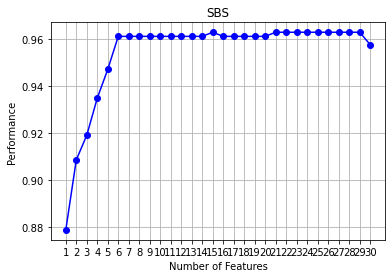

In [56]:
plot_sfs(sfs2.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title("SBS")
plt.grid()
plt.show()

In [51]:
feature_names = tuple(X.columns)
start_time_2 = time()
sfs1 = SFS(  # knn(n_neighbors=3),
    # rfc(n_jobs=8),
    LGR(max_iter=5000),
    k_features='best',
    forward=True,
    floating=False,
    verbose=2,
    # scoring = 'neg_mean_squared_error',  # sklearn regressors
    scoring='accuracy',  # sklearn classifiers
    cv=0)
sfs1 = sfs1.fit(X, y, custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished

[2022-07-19 04:08:33] Features: 1/30 -- score: 0.9191564147627417[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s finished

[2022-07-19 04:08:33] Features: 2/30 -- score: 0.9507908611599297[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished

[2022-07-19 04:08:34] Features: 3/30 -- score: 0.9560632688927944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s finished

[2022-07-19 04:09:15] Features: 29/30 -- score: 0.9578207381370826[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished

[2022-07-19 04:09:16] Features: 30/30 -- score: 0.9578207381370826

In [49]:
print("Selected features")
print(sfs1.k_feature_names_)
features_list_2 = np.array(sfs1.k_feature_names_)
print("Selected features shape ", features_list_2.shape)
print("Time taken ", (time() - start_time_2), " seconds")
print("Accuracy ",sfs1.k_score_)

Selected features
('radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'compactness_worst', 'concavity_worst')
Selected features shape  (12,)
Time taken  45.2070631980896  seconds
Accuracy  0.9630931458699473


C:\Users\Bharath Gera\Documents\Anaconda\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Bharath Gera\Documents\Anaconda\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


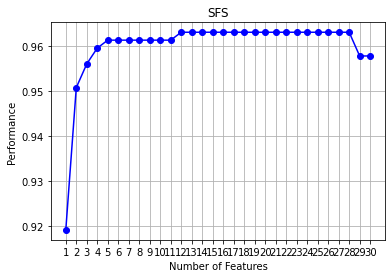

In [54]:
plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title("SFS")
plt.grid()
plt.show()

In [53]:
feature_names = tuple(X.columns)
start_time_2 = time()
sfs3 = SFS(  # knn(n_neighbors=3),
    # rfc(n_jobs=8),
    LGR(max_iter=5000),
    k_features='best',
    forward=True,
    floating=True,
    verbose=2,
    # scoring = 'neg_mean_squared_error',  # sklearn regressors
    scoring='accuracy',  # sklearn classifiers
    cv=0)
sfs3 = sfs3.fit(X, y, custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished

[2022-07-19 04:11:40] Features: 1/30 -- score: 0.9191564147627417[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-07-19 04:11:40] Features: 2/30 -- score: 0.9507908611599297[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.2s finished

[2022-07-19 04:12:08] Features: 15/30 -- score: 0.9648506151142355[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.2s finished

[2022-07-19 04:12:11] Features: 16/30 -- score: 0.9648506151142355[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    5.6s finished

[2022-07-19 04:13:10] Features: 27/30 -- score: 0.9648506151142355[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    7.5s finished

[2022-07-19 04:13:18] Features: 28/30 -- score: 0.9630931458699473[Parallel(n_jobs=1)]: U

In [58]:
print("Selected features")
print(sfs3.k_feature_names_)
features_list_2 = np.array(sfs3.k_feature_names_)
print("Selected features shape ", features_list_2.shape)
print("Time taken ", (time() - start_time_2), " seconds")
print("Accuracy ",sfs3.k_score_)

Selected features
('radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst')
Selected features shape  (24,)
Time taken  199.95151042938232  seconds
Accuracy  0.968365553602812


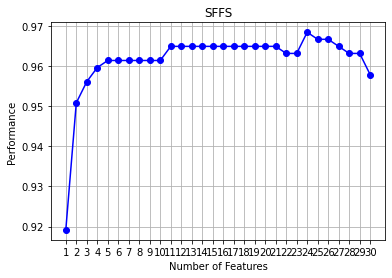

In [63]:
plot_sfs(sfs3.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title("SFFS")
plt.grid()
plt.show()

In [60]:
feature_names = tuple(X.columns)
start_time_2 = time()
sfs4 = SFS(  # knn(n_neighbors=3),
    # rfc(n_jobs=8),
    LGR(max_iter=5000),
    k_features='best',
    forward=False,
    floating=True,
    verbose=2,
    # scoring = 'neg_mean_squared_error',  # sklearn regressors
    scoring='accuracy',  # sklearn classifiers
    cv=0)
sfs4 = sfs4.fit(X, y, custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.7s finished

[2022-07-19 04:17:00] Features: 29/1 -- score: 0.9630931458699473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   10.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished

[2022-07-19 04:17:10] Features: 28/1 -- score: 0.9630931458699473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.8s finished

[2022-07-19 04:19:16] Features: 16/1 -- score: 0.9666080843585237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.6s finished

[2022-07-19 04:19:22] Features: 15/1 -- score: 0.9648506151142355[Parallel(n_jobs=1)]: Usi

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished

[2022-07-19 04:19:43] Features: 4/1 -- score: 0.9595782073813708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.2s finished

[2022-07-19 04:19:44] Features: 3/1 -- score: 0.9578207381370826[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [61]:
print("Selected features")
print(sfs4.k_feature_names_)
features_list_2 = np.array(sfs4.k_feature_names_)
print("Selected features shape ", features_list_2.shape)
print("Time taken ", (time() - start_time_2), " seconds")
print("Accuracy ",sfs4.k_score_)

Selected features
('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst')
Selected features shape  (16,)
Time taken  177.21881294250488  seconds
Accuracy  0.9666080843585237


C:\Users\Bharath Gera\Documents\Anaconda\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Bharath Gera\Documents\Anaconda\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


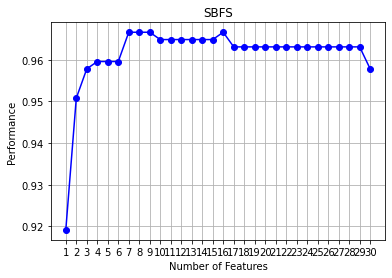

In [62]:
plot_sfs(sfs4.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title("SBFS")
plt.grid()
plt.show()